# Yelp Restaurant Reviews Data

This dataset consists of 500 positive and 500 negative reviews of some specific restaurant from yelp.

Data can be loaded with a couple of parameters:

    `names` to give the data column headers since it doesn’t have any. 
    `delimeter` to indicate that it’s tab-separated.
    `engine` to define the parsing engine as Python.
    `quoting` to determine the quoting behavior. 

The quoting parameter in pd.read_csv() specifies how to handle the quotation marks around text fields. It accepts several options:

    
    1: Quotes are used for fields that contain special characters, but they are not included in the data.
    2: Quotes are included in the data.
    3: Completely ignore quotes, treating them as any other character.
   

In [1]:
import pandas as pd
df = pd.read_csv('yelp_labelled.txt', delimiter = '\t', engine='python', quoting = 3,names=['review','status'])

C:\Users\amiry\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\amiry\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\amiry\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df.head(5)

,review,status
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Cleaning the Dataset
Let’s now use the `re` module to clean this dataset. The objective here is to remove everything from the reviews but letters. This will involve removing all punctuation marks such as commas, question marks, etc. The `sub` function from the `re` module can be used to replace the punctuation marks. After removing the punctuation marks, convert all the reviews to lower case. 

In [3]:
import re
def clean_data(review):
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    return review

Let’s now apply this function to the reviews. 

In [4]:
df['review'] = df['review'].apply(clean_data)

In [5]:
df.head(5)

,review,status
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


# Removing Stop Words
The reviews also contain common words such as ‘the’, ‘at’, etc that don’t tell us much about the polarity of a sentence. Let’s get rid of those. To remove them, you have to employ the service of the Natural Language Toolkit (nltk). Let’s import the package and download the stop words. 

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amiry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The next step is to define the function that will remove all the common words from the reviews. 

In [7]:
def remove_stop_words(review):
    review_minus_sw = []
    stop_words = stopwords.words('english')
    review = review.split()
    review = [review_minus_sw.append(word) for word in review if word not in stop_words]
    review = ' '.join(review_minus_sw)
    return review

In [8]:
df['review'] = df['review'].apply(remove_stop_words)


In [9]:
df.head(5)

,review,status
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


# Token Normalization
The next cleaning item on the menu is to convert the words in the reviews to their root form. For example, the word hated will be converted to its root form which is hate. This process is important because it reduces the number of words that will be fed to the machine learning model. `nltk` can assist us in converting the words in their root form. This can be done using the `WordNetLemmatizer` utility. This can also be done using the `PorterStemmer`. 

What is the difference between Stemmers and Lemmatizers?
Stemmers use algorithms to remove suffixes and prefixes from words and the final words may not be the dictionary representation of a word. For instance, applying the `PorterStemmer` to the word movie results in `movi` which is not an actual word in the dictionary. 

However, lemmatizers will usually convert a word to the dictionary representation. For example, the word `dogs` is converted to its root form which is `dog`. 

Let’s apply the `WordNetLemmatizer` here. The first step is to create the function that will be used to do this. 

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amiry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def lemmatize(review):
    lemmatizer = WordNetLemmatizer()
    words = review.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [12]:
df['review'] = df['review'].apply(lemmatize)

In [13]:
df.head(5)

,review,status
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1


# Splitting 

Let’s start by splitting the data into a training and validation set. 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
docs = df['review']
labels = df['status']
X_train, X_test , y_train, y_test = train_test_split(docs, labels , test_size = 0.20)

# Numerical Representation

The data has to be converted in some numerical representation. The `one_hot` function can be used to do this. The function will encode the reviews into a list of integers. It expects the following arguments: 

    `text` that is the text to be encoded
    `n` the size of the vocabulary 
    `filters` specify the characters to be removed from the reviews such as punctuation marks and any other special characters 
    `lower` indicates if the reviews should be converted to lower case or not
    `split` dictates how the reviews should be split 


In [16]:
from tensorflow.keras.preprocessing.text import one_hot

In [17]:
vocab_size = 5000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

In [18]:
print(docs[2])
print(X_train[2])

tasty texture nasty
[1642, 3440, 3124]


# Pad the Sequences
At the moment each review is represented by a sequence of integers. The only problem here is that the sequences are of different lengths. Usually, the data passed to a machine learning model is of the same length. Therefore, the sequences have to be forced to be of the same length. This is done by padding shorter sequences with zeros and dropping off some integers on very long sequences. This means that you have to define the maximum length of every sequence. Let’s use 100 here. This is a number that can be modified until you obtain the optimal one for the problem in question. 

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

The dataset is now ready, let’s move on to creating the convolution neural network. 

# CNN Architecture

The application of convolutional neural networks is the same as in image data. The only difference is that 1D convolutions are applied instead of 2D convolutions. In images, the kernel slides in 2D but in sequence data like text data the kernel slides in one dimension. 

The convolution network will be made of of the following: 

An embedding layer that turns the data into dense vectors of fixed size.
        
        A `Conv1D` with 128 filters with the `relu` activation function.
        
        A `MaxPooling` layer that downsamples the input by taking the maximum value.
        
        A `Dense` layer with 10 units for the fully connected layer.
        
        An output layer with the sigmoid activation function because this is a binary problem.

In [21]:
from tensorflow.keras.layers import Dense, Conv1D, Embedding,GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model


In [232]:
del model
model = Sequential([
    Embedding(vocab_size, 10, input_length=max_length),
   Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [233]:
print(model.summary())


Model: "sequential_1632"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1634 (Embedding)  (None, 100, 10)           50000     
                                                                 
 conv1d_1634 (Conv1D)        (None, 96, 128)           6528      
                                                                 
 global_max_pooling1d_1634 (  (None, 128)              0         
 GlobalMaxPooling1D)                                             
                                                                 
 dense_3266 (Dense)          (None, 10)                1290      
                                                                 
 dense_3267 (Dense)          (None, 1)                 11        
                                                                 
Total params: 57,829
Trainable params: 57,829
Non-trainable params: 0
_______________________________________________

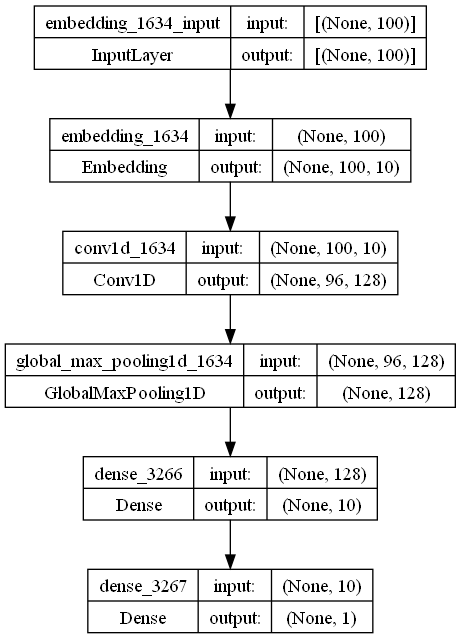

In [234]:
plot_model(model, show_shapes=True, to_file='model.png')

The next step is to prepare the model for training. Let’s apply the common `Adam` optimizer and the `binary_crossentropy` loss function. 



In [235]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

The next move is to train the model on the training set. You can also set the validation set at this stage.

In [236]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 1s 19ms/step - loss: 0.6942 - acc: 0.4900 - val_loss: 0.6932 - val_acc: 0.4900
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 0.6897 - acc: 0.6050 - val_loss: 0.6917 - val_acc: 0.5250
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 0.6828 - acc: 0.6338 - val_loss: 0.6871 - val_acc: 0.5800
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 0.6527 - acc: 0.8100 - val_loss: 0.6597 - val_acc: 0.6500
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 0.5478 - acc: 0.8888 - val_loss: 0.5901 - val_acc: 0.6800
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3394 - acc: 0.9350 - val_loss: 0.5344 - val_acc: 0.7150
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.1760 - acc: 0.9513 - val_loss: 0.5538 - val_acc: 0.7500
Epoch 8/20
25/25 [==============================] - 0s 9ms/step - loss: 0.1075 - acc

Once, the training is done, the next step is to evaluate the model on the testing set. 

In [237]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

7/7 [==============================] - 0s 5ms/step - loss: 1.0214 - acc: 0.7100
Testing Accuracy is 70.99999785423279 


# Plotting Accuracy

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[]

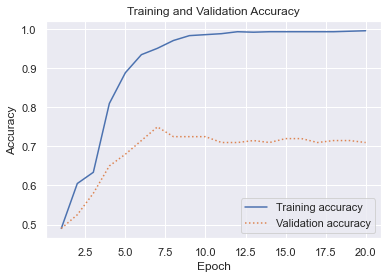

In [239]:
sns.set()

acc = history.history['acc']
val = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


# predict
Use test data and predict probability for each sample

In [240]:
y_pred=model.predict(X_test)[:][:]

7/7 [==============================] - 0s 4ms/step


# Confusion Matrix
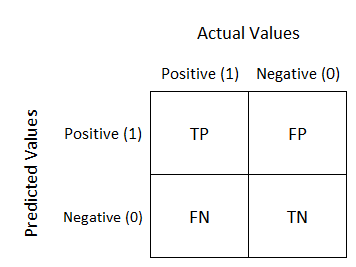


In [241]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [242]:
# Convert probabilities to binary predictions
threshold = 0.5
binary_predictions = np.where(y_pred >= threshold, 1, 0)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, binary_predictions)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[69 36]
 [22 73]]


# Hyperparameter Optimization
The model achieves an accuracy of 70.99%. You might get different results here because of the way weights are initialized. However, let’s look at whether this accuracy can be increased by using grid search hyperparameter optimization. 

In [33]:
def model_to_optimize(encoding_size, num_filters, kernel_size, neuron_size):
    model1 = Sequential([
        Embedding(vocab_size, encoding_size, input_length=max_length),
        Conv1D(num_filters, kernel_size, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(neuron_size, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1


In [34]:
params = {
    "encoding_size":[10, 20, 60, 100],
    "num_filters":[32, 64, 100, 128],
    "kernel_size":[2, 3, 4, 5, 7],
    "neuron_size":[8, 10, 15, 20],
}

# Define the Keras Classifier

The next step is to define the model using the `KerasClassifier` wrapper function. The function expects:

In [35]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [36]:
model_grid = KerasClassifier(build_fn=model_to_optimize,epochs=20,batch_size=10,verbose=False)

C:\Users\amiry\AppData\Local\Temp/ipykernel_3112/386244970.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_grid = KerasClassifier(build_fn=model_to_optimize,epochs=20,batch_size=10,verbose=False)


# Performing Grid Search
Let’s now perform the grid search. The `GridSearchCV` expects:

The model defined above 
The parameters defined above 
The `cv` that dictates how cross-validation will be performed. If none is defined, 5-fold cross-validation is used. If an integer is used, it defines the number of folds in a (Stratified) KFold. 
The next step after creating an instance of `GridSearchCV` is to fit it to the training data. 

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
search = GridSearchCV(estimator=model_grid, param_grid=params,cv=5, verbose=1)
search_result = search.fit(X_train, y_train)



Fitting 5 folds for each of 320 candidates, totalling 1600 fits


After the fitting is done, the accuracy can be obtained using the `score` method. 

In [39]:
test_accuracy = search.score(X_test, y_test)

You can also check for the parameter combination that resulted in the best results.


In [40]:
search.best_params_

{'encoding_size': 100, 'kernel_size': 2, 'neuron_size': 8, 'num_filters': 64}

The other thing you can do is to check the cross-validated results. 



In [41]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_encoding_size,param_kernel_size,param_neuron_size,param_num_filters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.101034,0.661276,0.199879,0.030366,10,2,8,32,"{'encoding_size': 10, 'kernel_size': 2, 'neuro...",0.71875,0.68750,0.71250,0.70625,0.71250,0.70750,0.010753,275
1,6.995734,0.353062,0.173226,0.009723,10,2,8,64,"{'encoding_size': 10, 'kernel_size': 2, 'neuro...",0.68750,0.73125,0.71250,0.74375,0.73125,0.72125,0.019605,114
2,7.134384,0.260499,0.182666,0.006122,10,2,8,100,"{'encoding_size': 10, 'kernel_size': 2, 'neuro...",0.72500,0.75000,0.70625,0.71250,0.74375,0.72750,0.017048,38
3,6.869735,0.240145,0.179908,0.011846,10,2,8,128,"{'encoding_size': 10, 'kernel_size': 2, 'neuro...",0.71250,0.72500,0.72500,0.74375,0.66250,0.71375,0.027500,199
4,6.884026,0.399896,0.174823,0.007139,10,2,10,32,"{'encoding_size': 10, 'kernel_size': 2, 'neuro...",0.68750,0.72500,0.70625,0.68750,0.66875,0.69500,0.019121,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,6.512011,0.198802,0.165217,0.003951,100,7,15,128,"{'encoding_size': 100, 'kernel_size': 7, 'neur...",0.74375,0.71250,0.74375,0.66875,0.72500,0.71875,0.027670,146
316,6.142744,0.152300,0.161129,0.003273,100,7,20,32,"{'encoding_size': 100, 'kernel_size': 7, 'neur...",0.70625,0.71875,0.72500,0.66250,0.74375,0.71125,0.027214,229
317,6.315527,0.268221,0.160517,0.002904,100,7,20,64,"{'encoding_size': 100, 'kernel_size': 7, 'neur...",0.73125,0.74375,0.75000,0.67500,0.70625,0.72125,0.027557,101
318,6.404274,0.165813,0.162136,0.006056,100,7,20,100,"{'encoding_size': 100, 'kernel_size': 7, 'neur...",0.75625,0.71875,0.72500,0.66875,0.71875,0.71750,0.028062,153


# Model with the Best Parameters


In [229]:
del best_model
best_model = Sequential([
    Embedding(vocab_size, 100, input_length=max_length),
    Conv1D(64, 2, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [230]:
history_best = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 1s 20ms/step - loss: 0.6893 - accuracy: 0.5825 - val_loss: 0.6820 - val_accuracy: 0.6300
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6409 - accuracy: 0.8950 - val_loss: 0.6522 - val_accuracy: 0.7100
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5418 - accuracy: 0.9212 - val_loss: 0.5782 - val_accuracy: 0.7450
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3661 - accuracy: 0.9362 - val_loss: 0.4880 - val_accuracy: 0.7600
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.1988 - accuracy: 0.9600 - val_loss: 0.4681 - val_accuracy: 0.7650
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.1054 - accuracy: 0.9787 - val_loss: 0.5070 - val_accuracy: 0.7800
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0633 - accuracy: 0.9887 - val_loss: 0.5684 - val_accuracy: 0.7600
Epoch 8/20
25/25 [=

In [231]:
loss, accuracy = best_model.evaluate(X_test,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

7/7 [==============================] - 0s 5ms/step - loss: 0.8521 - accuracy: 0.7550
Testing Accuracy is 75.49999952316284 


# Plotting Accuracy

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[]

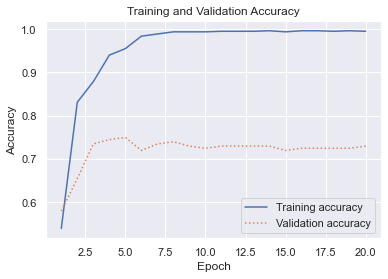

In [206]:
sns.set()

acc = history_best.history['accuracy']
val = history_best.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


# predict
Use test data and predict probability for each sample

In [243]:
y_pred=best_model.predict(X_test)[:][:]

7/7 [==============================] - 0s 4ms/step


# Confusion Matrix
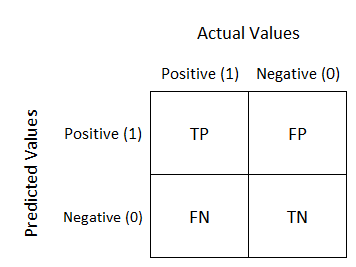

In [244]:
# Convert probabilities to binary predictions
threshold = 0.5
binary_predictions = np.where(y_pred >= threshold, 1, 0)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, binary_predictions)

print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[75 30]
 [19 76]]
